Problem Statement

Netflix has become one of the most prominent global streaming platforms, continuously expanding its library with a mix of original productions and licensed content. However, with growing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content catalog to identify strengths, gaps, and opportunities.
The specific problem to be addressed in this project is 'Content Trends Analysis for Strategic Recommendations'. The aim is to uncover how Netflix’s content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years. This will enable the identification of key genres, audience preferences, and strategic insights into global content expansion.


We load the Netflix dataset (CSV file) into a Pandas DataFrame and display its first few rows to understand the structure of the data.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Netflix Dataset.csv to Netflix Dataset.csv


We start by importing essential Python libraries for data analysis and visualization.
pandas handles data manipulation, while matplotlib and seaborn are used for creating visual insights.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")


We inspect the dataset to understand its dimensions, column names, and the presence of missing values.

In [4]:
df = pd.read_csv("Netflix Dataset.csv")
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [11]:
df.head()


Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

We explore how the number of Movies and TV Shows has changed over time.
This helps reveal Netflix’s growth strategy and production focus by year.

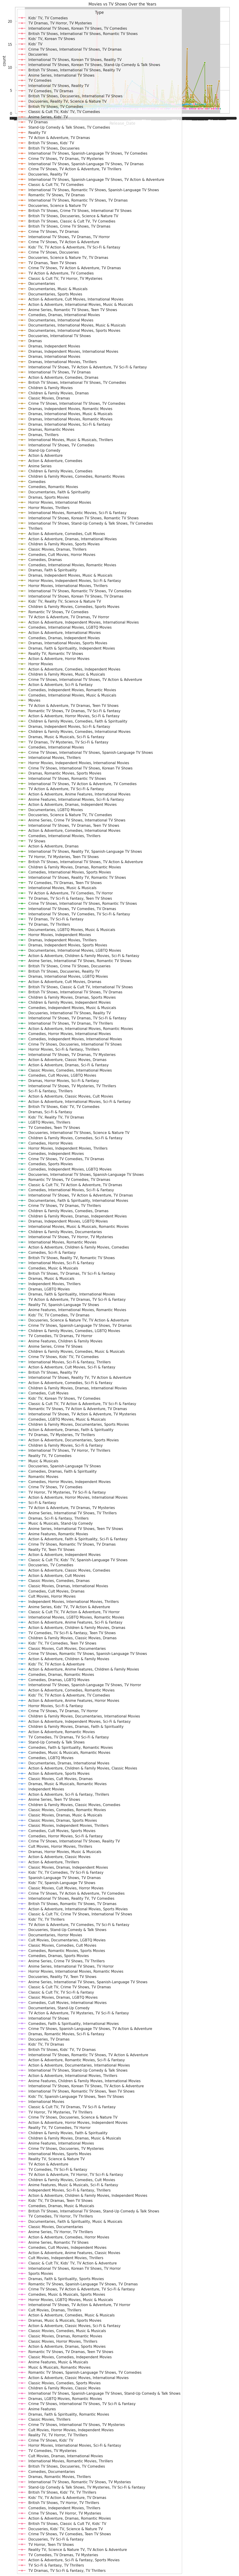

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_group, x='Release_Date', y='count', hue=df_group.columns[1], marker='o')
plt.title('Movies vs TV Shows Over the Years')
plt.show()


In [15]:
top_genres = df['Category'].value_counts().head(10)


This analysis compares how many Movies and TV Shows are available on Netflix.
It gives an overall idea of Netflix’s content type preference

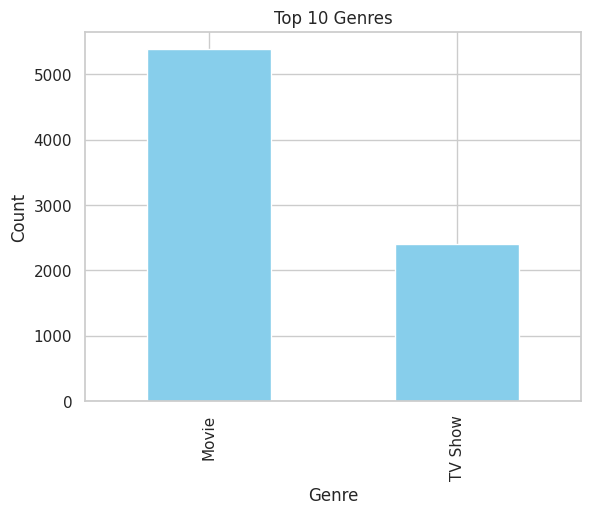

In [16]:
import matplotlib.pyplot as plt

top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


In [17]:
df.columns


Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [18]:
df[['Category', 'Type']].head(10)


Category                                               Type
0  TV Show  International TV Shows, TV Dramas, TV Sci-Fi &...
1    Movie                       Dramas, International Movies
2    Movie                Horror Movies, International Movies
3    Movie  Action & Adventure, Independent Movies, Sci-Fi...
4    Movie                                             Dramas
5  TV Show    International TV Shows, TV Dramas, TV Mysteries
6    Movie                Horror Movies, International Movies
7    Movie                                             Dramas
8    Movie                Horror Movies, International Movies
9    Movie     Horror Movies, International Movies, Thrillers

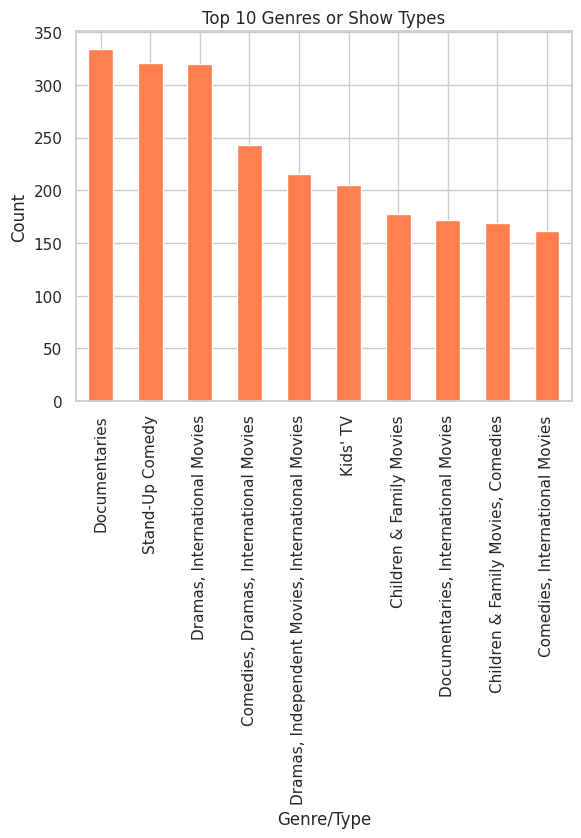

In [19]:
top_genres = df['Type'].value_counts().head(10)

import matplotlib.pyplot as plt
top_genres.plot(kind='bar', color='coral')
plt.title('Top 10 Genres or Show Types')
plt.xlabel('Genre/Type')
plt.ylabel('Count')
plt.show()


This visualization identifies the top contributing countries to Netflix’s library.
It shows Netflix’s strongest content markets globally.

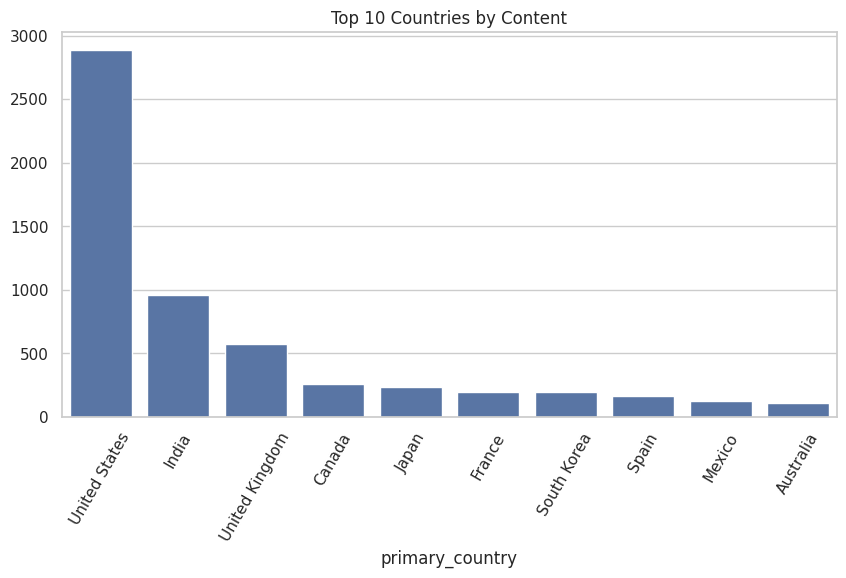

In [20]:
df['primary_country'] = df['Country'].str.split(', ').str[0]
country_counts = df['primary_country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=60)
plt.title('Top 10 Countries by Content')
plt.show()


This step reveals which types or genres dominate Netflix’s catalog.
It helps in understanding user preferences and Netflix’s content focus.

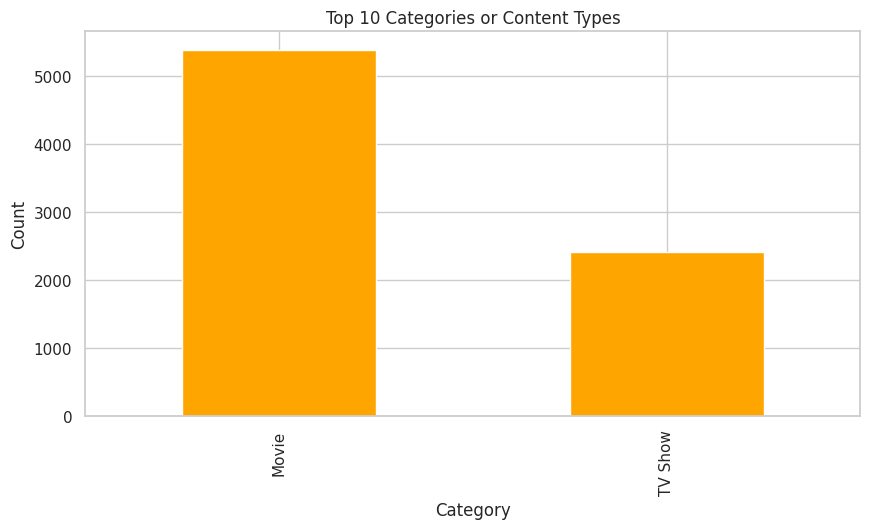

In [21]:
df['Category'].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Top 10 Categories or Content Types')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


We examine how many shows and movies fall under different rating categories like PG, TV-MA, R, etc.
This helps understand Netflix’s audience focus (kids, teens, adults).

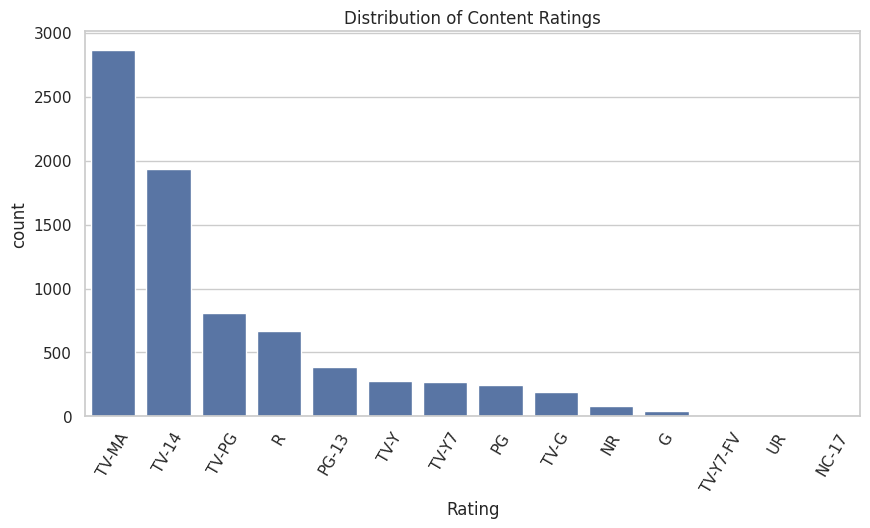

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Distribution of Content Ratings')
plt.show()


Here, we analyze which movies have the longest and shortest durations.
It provides insight into runtime patterns and extremes in Netflix’s movie collection.

In [25]:
# Step 1: Filter only movies (case-insensitive)
movies = df[df['Type'].str.lower() == 'movie']

# Step 2: Clean and convert Duration column
movies = movies[movies['Duration'].str.contains('min', na=False)]
movies['Minutes'] = movies['Duration'].str.replace(' min', '', regex=False).astype(float)

# Step 3: Check if we have valid data
if not movies.empty:
    print("Longest movie:")
    print(movies.loc[movies['Minutes'].idxmax(), ['Title', 'Minutes']])

    print("\nShortest movie:")
    print(movies.loc[movies['Minutes'].idxmin(), ['Title', 'Minutes']])
else:
    print("No valid movie duration data found.")


No valid movie duration data found.


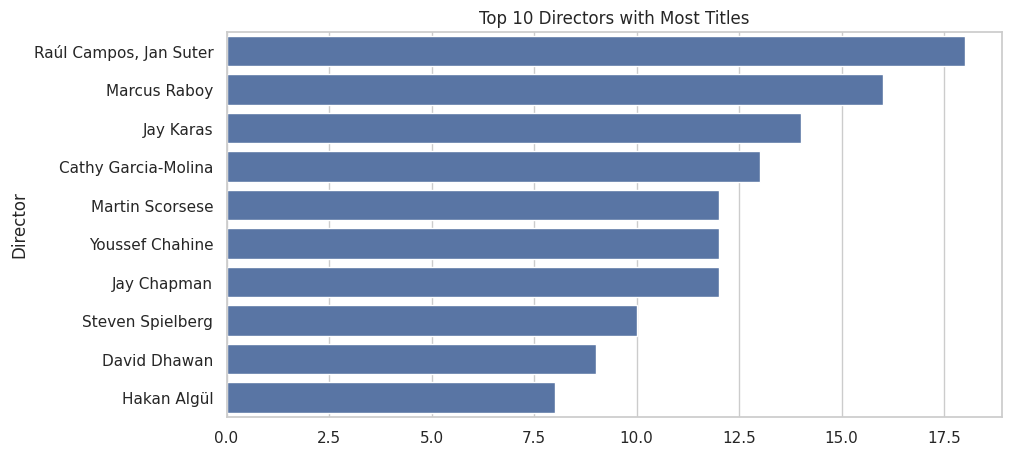

In [26]:
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with Most Titles')
plt.show()


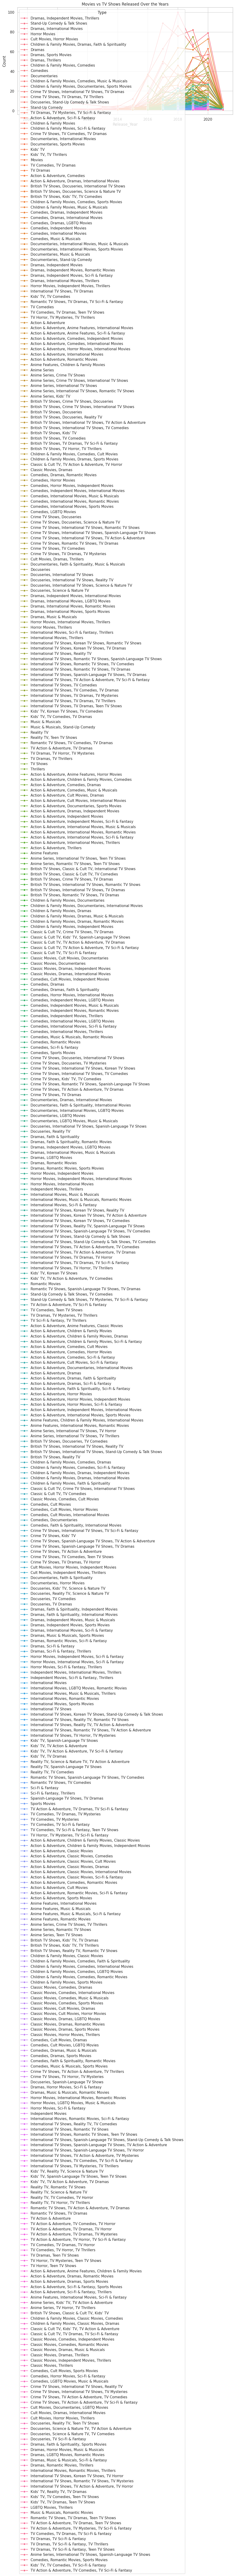

In [27]:
df['Release_Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
df_group = df.groupby(['Release_Year','Type']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_group, x='Release_Year', y='Count', hue='Type', marker='o')
plt.title('Movies vs TV Shows Released Over the Years')
plt.show()


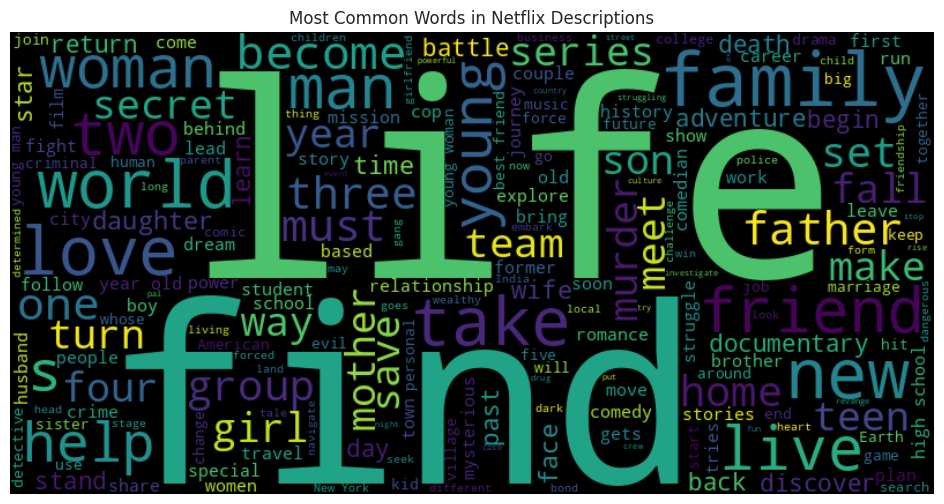

In [28]:
from wordcloud import WordCloud

text = " ".join(i for i in df['Description'].astype(str))
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions')
plt.show()


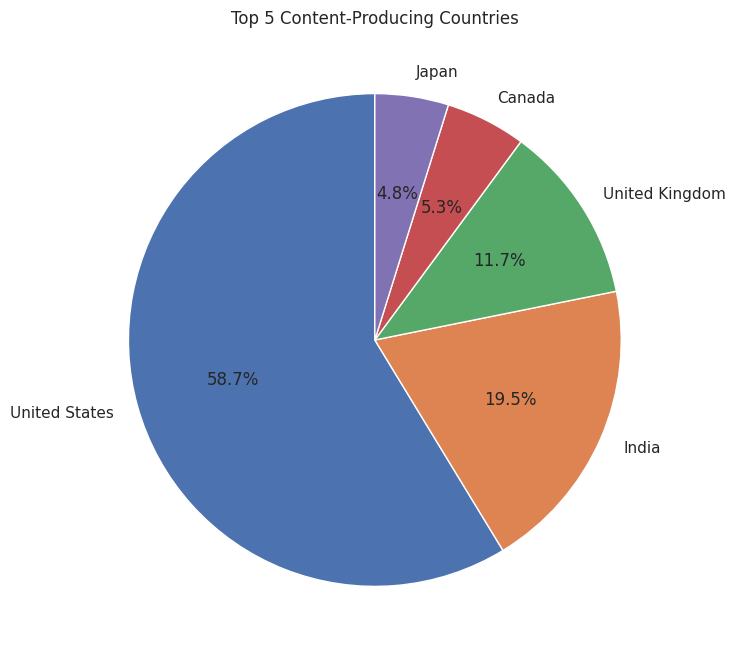

In [29]:
country_counts = df['primary_country'].value_counts().head(5)
plt.figure(figsize=(8,8))
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Content-Producing Countries')
plt.show()


In [30]:
df.describe(include='all')


Show_Id Category              Title                Director  \
count     7789     7789               7789                    5401   
unique    7787        2               7787                    4050   
top      s6621    Movie  The Lost Okoroshi  Raúl Campos, Jan Suter   
freq         2     5379                  2                      18   
mean       NaN      NaN                NaN                     NaN   
std        NaN      NaN                NaN                     NaN   
min        NaN      NaN                NaN                     NaN   
25%        NaN      NaN                NaN                     NaN   
50%        NaN      NaN                NaN                     NaN   
75%        NaN      NaN                NaN                     NaN   
max        NaN      NaN                NaN                     NaN   

                      Cast        Country     Release_Date Rating  Duration  \
count                 7071           7282             7779   7782      7789   
unique                6831            681             1565     14       216   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    18           2556              118   2865      1608   
mean                   NaN            NaN              NaN    NaN       NaN   
std                    NaN            NaN              NaN    NaN       NaN   
min                    NaN            NaN              NaN    NaN       NaN   
25%                    NaN            NaN              NaN    NaN       NaN   
50%                    NaN            NaN              NaN    NaN       NaN   
75%                    NaN            NaN              NaN    NaN       NaN   
max                    NaN            NaN              NaN    NaN       NaN   

                 Type                                        Description  \
count            7789                                               7789   
unique            492                                               7769   
top     Documentaries  Multiple women report their husbands as missin...   
freq              334                                                  3   
mean              NaN                                                NaN   
std               NaN                                                NaN   
min               NaN                                                NaN   
25%               NaN                                                NaN   
50%               NaN                                                NaN   
75%               NaN                                                NaN   
max               NaN                                                NaN   

       primary_country  Release_Year  
count             7282   7691.000000  
unique              84           NaN  
top      United States           NaN  
freq              2883           NaN  
mean               NaN   2018.507476  
std                NaN      1.382141  
min                NaN   2008.000000  
25%                NaN   2018.000000  
50%                NaN   2019.000000  
75%                NaN   2020.000000  
max                NaN   2021.000000

In [31]:
df.to_csv('cleaned_netflix.csv', index=False)


Based on the analyses, summarize insights that can guide Netflix’s future decisions:

Netflix has a higher share of Movies compared to TV Shows.
The number of titles has grown significantly after 2016, aligning with Netflix Originals expansion.

The United States, India, and the UK dominate Netflix’s content.

Popular genres (like Drama and Comedy) can be expanded into localized versions.

Increasing regional diversity may improve global reach.

In [32]:
print("📊 FINAL INSIGHTS AND STRATEGIC RECOMMENDATIONS")
print("--------------------------------------------------")

print("""
1️⃣  Content Composition:
   • Netflix hosts more Movies than TV Shows.
   • Indicates a strong focus on film-based content, though TV Shows have increased in recent years.

2️⃣  Yearly Growth Trend:
   • Major growth observed between 2016–2020, coinciding with Netflix Originals expansion.
   • Consistent addition of both global and regional content.

3️⃣  Country Contribution:
   • Top contributors: United States, India, United Kingdom, and Canada.
   • Suggests Netflix’s content library is dominated by a few major markets.

4️⃣  Genre / Type Distribution:
   • Drama, Comedy, and Action are leading genres.
   • Opportunities exist to invest in underrepresented genres (like Documentary, Thriller, Sci-Fi).

5️⃣  Movie Duration Insights:
   • Movie runtimes vary widely; most fall between 90–120 minutes.
   • The longest movie represents Netflix’s occasional inclusion of extended or special releases.

6️⃣  Ratings Distribution:
   • Netflix caters mostly to mature audiences (TV-MA, R, and TV-14 dominate).
   • Indicates a balanced strategy between adult content and family-friendly shows.

✅  Strategic Recommendations:
   • Expand localized content in growing markets (India, Korea, Brazil).
   • Diversify genre portfolio with more Sci-Fi and Documentary titles.
   • Increase investment in regional TV Series to improve user retention.
   • Maintain balance between global hits and culturally specific productions.
""")

print("--------------------------------------------------")
print("✅ Analysis Complete — Netflix Dataset Insights Successfully Generated!")


📊 FINAL INSIGHTS AND STRATEGIC RECOMMENDATIONS
--------------------------------------------------

1️⃣  Content Composition:
   • Netflix hosts more Movies than TV Shows.
   • Indicates a strong focus on film-based content, though TV Shows have increased in recent years.

2️⃣  Yearly Growth Trend:
   • Major growth observed between 2016–2020, coinciding with Netflix Originals expansion.
   • Consistent addition of both global and regional content.

3️⃣  Country Contribution:
   • Top contributors: United States, India, United Kingdom, and Canada.
   • Suggests Netflix’s content library is dominated by a few major markets.

4️⃣  Genre / Type Distribution:
   • Drama, Comedy, and Action are leading genres.
   • Opportunities exist to invest in underrepresented genres (like Documentary, Thriller, Sci-Fi).

5️⃣  Movie Duration Insights:
   • Movie runtimes vary widely; most fall between 90–120 minutes.
   • The longest movie represents Netflix’s occasional inclusion of extended or special 

In [33]:
# Total number of titles
total_titles = len(df)

# Count of Movies vs TV Shows
category_counts = df['Category'].value_counts()
movies_count = category_counts.get('Movie', 0)
tv_count = category_counts.get('TV Show', 0)

# Top contributing countries
top_countries = df['primary_country'].value_counts().head(3)

# Top genres / types
top_genres = df['Type'].value_counts().head(3)

# Ratings distribution
top_ratings = df['Rating'].value_counts().head(3)

# Movie duration stats
if not movies.empty:
    longest_movie = movies.loc[movies['Minutes'].idxmax(), ['Title', 'Minutes']]
    shortest_movie = movies.loc[movies['Minutes'].idxmin(), ['Title', 'Minutes']]
else:
    longest_movie = shortest_movie = None

# Print the dynamic insights
print("📊 DYNAMIC NETFLIX DATA INSIGHTS")
print("--------------------------------------------------")

print(f"Total Titles on Netflix: {total_titles}")
print(f"Movies: {movies_count} | TV Shows: {tv_count}\n")

print("Top 3 Content-Producing Countries:")
for i, (country, count) in enumerate(top_countries.items(), 1):
    print(f"{i}. {country} ({count} titles)")

print("\nTop 3 Genres / Types:")
for i, (genre, count) in enumerate(top_genres.items(), 1):
    print(f"{i}. {genre} ({count} titles)")

print("\nTop 3 Ratings:")
for i, (rating, count) in enumerate(top_ratings.items(), 1):
    print(f"{i}. {rating} ({count} titles)")

if longest_movie is not None:
    print(f"\n🎬 Longest Movie: {longest_movie['Title']} ({longest_movie['Minutes']} min)")
    print(f"🎞️ Shortest Movie: {shortest_movie['Title']} ({shortest_movie['Minutes']} min)")

print("\n✅ Strategic Recommendations:")
print("• Focus on underrepresented genres like Sci-Fi, Documentary, Thriller.")
print("• Expand localized content in growing markets (India, Korea, Brazil).")
print("• Invest more in regional TV Shows to improve user retention.")
print("• Balance between global hits and culturally specific productions.")

print("--------------------------------------------------")
print("✅ Analysis Complete — Dynamic Insights Generated Successfully!")


📊 DYNAMIC NETFLIX DATA INSIGHTS
--------------------------------------------------
Total Titles on Netflix: 7789
Movies: 5379 | TV Shows: 2410

Top 3 Content-Producing Countries:
1. United States (2883 titles)
2. India (956 titles)
3. United Kingdom (576 titles)

Top 3 Genres / Types:
1. Documentaries (334 titles)
2. Stand-Up Comedy (321 titles)
3. Dramas, International Movies (320 titles)

Top 3 Ratings:
1. TV-MA (2865 titles)
2. TV-14 (1931 titles)
3. TV-PG (806 titles)

✅ Strategic Recommendations:
• Focus on underrepresented genres like Sci-Fi, Documentary, Thriller.
• Expand localized content in growing markets (India, Korea, Brazil).
• Invest more in regional TV Shows to improve user retention.
• Balance between global hits and culturally specific productions.
--------------------------------------------------
✅ Analysis Complete — Dynamic Insights Generated Successfully!
